In [49]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

The project says, build a model which can be used to predict in terms of a probability for each 
loan transaction, whether the customer will be paying back the loaned amount within 5 days of 
insurance of loan.

We need to read the dataset

In [50]:
# Reading the data from csv file
ds = pd.read_csv('Data file.csv')
ds

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


We will remove the unwanted columns

In [51]:
ds.drop(columns=['Unnamed: 0', 'pcircle'], inplace=True)

We will remove the duplicate rows from the dataset

In [52]:
# Removing the duplicate rows from the dataset

print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (209593, 35)
Shape of dataset after removing duplicates:  (209592, 35)


In [53]:
# Reading the head of the data
ds.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [54]:
# Checking the columns of the dataset
ds.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate'],
      dtype='object')

In [55]:
# Checking the datatypes of columns
ds.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [56]:
# Checking the dataset columns information
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209592 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209592 non-null  int64  
 1   msisdn                209592 non-null  object 
 2   aon                   209592 non-null  float64
 3   daily_decr30          209592 non-null  float64
 4   daily_decr90          209592 non-null  float64
 5   rental30              209592 non-null  float64
 6   rental90              209592 non-null  float64
 7   last_rech_date_ma     209592 non-null  float64
 8   last_rech_date_da     209592 non-null  float64
 9   last_rech_amt_ma      209592 non-null  int64  
 10  cnt_ma_rech30         209592 non-null  int64  
 11  fr_ma_rech30          209592 non-null  float64
 12  sumamnt_ma_rech30     209592 non-null  float64
 13  medianamnt_ma_rech30  209592 non-null  float64
 14  medianmarechprebal30  209592 non-null  float64
 15  

# Summarize the 'Label' distribution

In [57]:
from collections import Counter

target = ds.values[:,0]
counter = Counter(target)

for k, v in counter.items():
    per = v/len(target) * 100
    print ('Label = %s, Count=%d, Percentage=%.3f%%' %(k, v, per) )

Label = 0, Count=26162, Percentage=12.482%
Label = 1, Count=183430, Percentage=87.518%


# Checking the unique values of columns of dataset

In [58]:
ds['label'].unique()

array([0, 1], dtype=int64)

Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter. 

In [59]:
ds['cnt_ma_rech30'].unique()

array([  2,   1,   0,   7,   4,   3,   5,  15,   6,   9,  10,  11,  13,
         8,  12,  16,  18,  19,  29,  17,  14,  21,  27,  22,  37,  23,
        20,  26,  25,  24,  34,  28,  32,  35,  31,  33,  40,  30,  41,
        36,  52,  38,  48,  61,  39,  54,  84,  42,  44,  46,  45,  47,
        49,  43,  55,  74,  58,  64,  59,  53,  51,  77,  78,  50,  91,
        99, 115, 203,  60,  71,  63], dtype=int64)

In [60]:
ds['cnt_da_rech90'].unique()

array([ 0,  1,  3,  2,  5,  6,  8,  4, 27,  7,  9, 14, 12, 22, 13, 10, 16,
       19, 11, 15, 38, 18, 20, 30, 28, 25, 17], dtype=int64)

In [61]:
ds['medianamnt_loans30'].unique()

array([0. , 1. , 0.5, 2. , 1.5, 3. ])

In [62]:
ds['maxamnt_loans90'].unique()

array([ 6, 12,  0], dtype=int64)

In [63]:
ds['medianamnt_loans90'].unique()

array([0. , 1. , 0.5, 2. , 1.5, 3. ])

In [64]:
# identifying the number columns
ds_int = ds.select_dtypes(include=['int64', 'int32'])
ds_int.columns

Index(['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90',
       'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'],
      dtype='object')

In [65]:
# identifying the category columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index(['msisdn', 'pdate'], dtype='object')

# Statistical Summary

In [66]:
ds.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,...,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000
mean,0.875177,8112.380399,5381.412999,6082.529123,2692.578912,3483.407309,3755.865715,3712.220632,2064.458973,3.978053,...,2.758975,17.951992,274.660029,0.054029,18.520988,23.645397,6.703138,0.046078,3.398639,4.321302
std,0.330519,75696.261220,9220.644093,10918.836919,4308.596841,5770.475034,53906.020204,53374.960145,2370.790003,4.256099,...,2.554507,17.379778,4245.274734,0.218039,224.797957,26.469924,2.103869,0.200692,8.813330,10.307791
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.439500,42.691917,280.417500,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.091833,1500.000000,1083.540000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.096000,7802.795000,3356.945000,4201.792500,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In most of the columns, mean is greater than the median, it seems outliers are present in the dataset

Checking for null values in the dataset

In [67]:
ds.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

In [68]:
# checking for NaN values
ds.isna().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

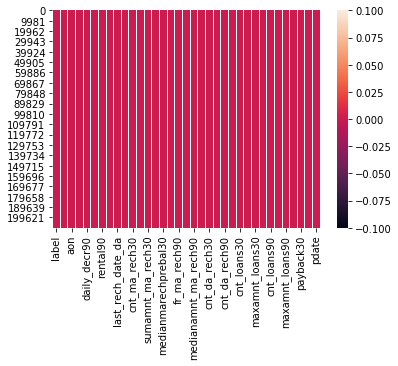

In [69]:
# Checking the null values through heatmap visualization
sns.heatmap(ds.isnull())
plt.show()

# Checking the corelation

In [70]:
ds.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166151,0.058084,0.075521,0.003728,0.001711,0.131805,0.237331,...,0.196283,0.197272,0.000248,0.044590,0.004733,0.199788,0.084144,0.035747,0.048330,0.049178
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001942,0.002205
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366117,0.471492,-0.000028,-0.011611,0.008962,0.563496,0.400199,-0.037305,0.026922,0.047181
daily_decr90,0.166151,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264130,0.426708,...,0.340387,0.447869,0.000025,-0.005592,0.009446,0.567204,0.397251,-0.034686,0.019406,0.040806
rental30,0.058084,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003262,0.127272,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234212,-0.035489,0.072974,0.095148
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067114,0.099505
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002231,-0.001582
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003262,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000079,0.000418
last_rech_amt_ma,0.131805,0.004256,0.275837,0.264130,0.127272,0.121416,-0.000147,-0.000149,1.000000,-0.002661,...,-0.027611,0.008503,0.001000,0.028370,0.000093,0.014067,0.148459,0.021004,-0.027358,-0.014251
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426708,0.233343,0.230260,0.004311,0.001549,-0.002661,1.000000,...,0.765802,0.752296,0.000110,-0.067010,0.014703,0.685257,0.174105,-0.071451,0.043614,0.017358


Most of the values are positively co related with each other

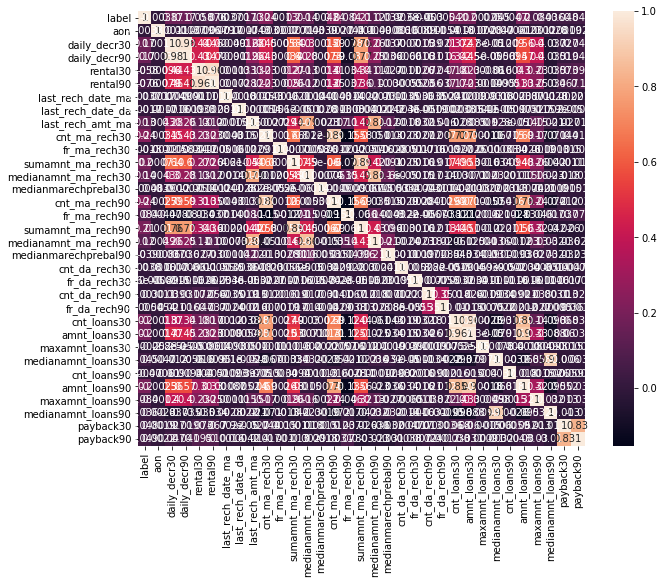

In [71]:
# Checking the corelation through heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ds.corr(), annot=True)
plt.show()

# Univariate Analysis

# Countplots for features

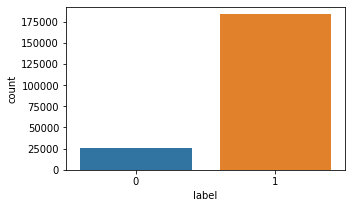

In [72]:
plt.figure(figsize=(5, 3))
sns.countplot(ds['label'])
plt.show()

It seems most of the people are Non-Defaulters

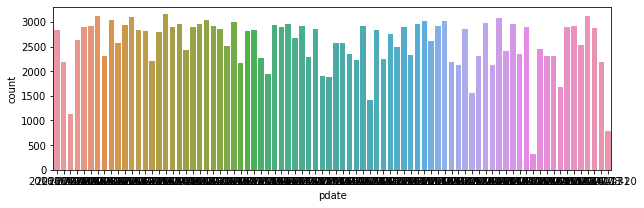

In [73]:
plt.figure(figsize=(10, 3))
sns.countplot(ds['pdate'])
plt.show()

# PiePlot

A pie plot show the data in the form of pie chart

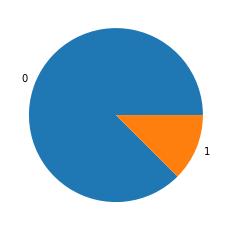

In [74]:
plt.figure(figsize=(4,4))
plt.pie(ds['label'].value_counts(), labels=ds.label.unique())
plt.show()

# LabelEncoder: To change categorical data to number data

In [75]:
le = LabelEncoder()
ds['msisdn'] = le.fit_transform(ds['msisdn'])
ds['pdate'] = le.fit_transform(ds['pdate'])

In [76]:
# After LabelEncoder, checking the data types of columns
ds.dtypes

label                     int64
msisdn                    int32
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

# Plotting Outliers

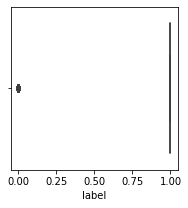

In [77]:
plt.figure(figsize=(3,3))
sns.boxplot(ds['label'])
plt.show()

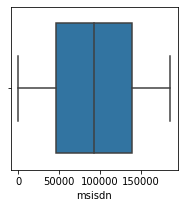

In [78]:
plt.figure(figsize=(3,3))
sns.boxplot(ds['msisdn'])
plt.show()

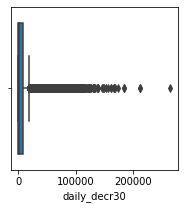

In [79]:
plt.figure(figsize=(3,3))
sns.boxplot(ds['daily_decr30'])
plt.show()

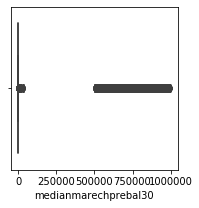

In [80]:
plt.figure(figsize=(3,3))
sns.boxplot(ds['medianmarechprebal30'])
plt.show()

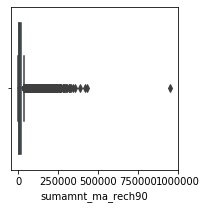

In [81]:
plt.figure(figsize=(3,3))
sns.boxplot(ds['sumamnt_ma_rech90'])
plt.show()

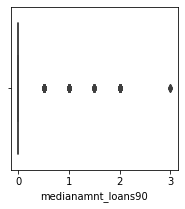

In [82]:
plt.figure(figsize=(3,3))
sns.boxplot(ds['medianamnt_loans90'])
plt.show()

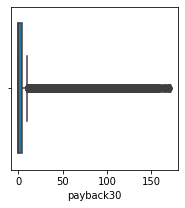

In [83]:
plt.figure(figsize=(3,3))
sns.boxplot(ds['payback30'])
plt.show()

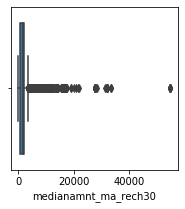

In [84]:
plt.figure(figsize=(3,3))
sns.boxplot(ds['medianamnt_ma_rech30'])
plt.show()

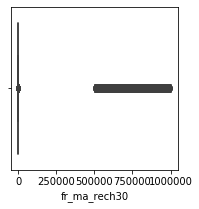

In [85]:
plt.figure(figsize=(3,3))
sns.boxplot(ds['fr_ma_rech30'])
plt.show()

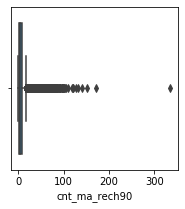

In [86]:
plt.figure(figsize=(3,3))
sns.boxplot(ds['cnt_ma_rech90'])
plt.show()

From the above boxplot, it seems outliers are present in the dataset.

In [87]:
collist = ds.columns.values
collist

array(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90', 'pdate'], dtype=object)

# Distributionplot: To check the skewness of data

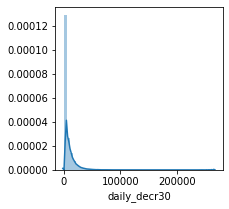

In [88]:
plt.figure(figsize=(3,3))
sns.distplot(ds['daily_decr30'])
plt.show()

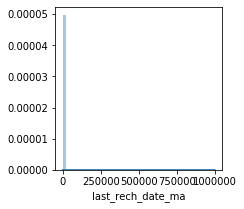

In [89]:
plt.figure(figsize=(3,3))
sns.distplot(ds['last_rech_date_ma'])
plt.show()

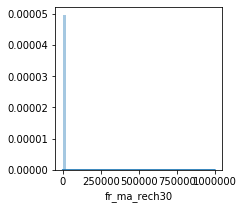

In [90]:
plt.figure(figsize=(3,3))
sns.distplot(ds['fr_ma_rech30'])
plt.show()

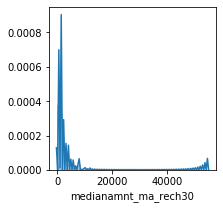

In [91]:
plt.figure(figsize=(3,3))
sns.distplot(ds['medianamnt_ma_rech30'])
plt.show()

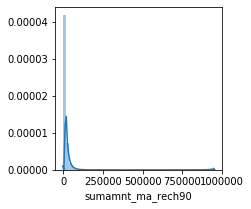

In [92]:
plt.figure(figsize=(3,3))
sns.distplot(ds['sumamnt_ma_rech90'])
plt.show()

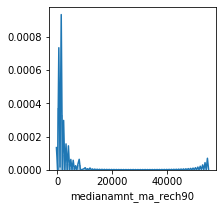

In [93]:
plt.figure(figsize=(3,3))
sns.distplot(ds['medianamnt_ma_rech90'])
plt.show()

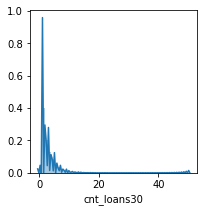

In [94]:
plt.figure(figsize=(3,3))
sns.distplot(ds['cnt_loans30'])
plt.show()

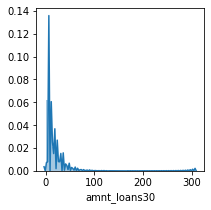

In [95]:
plt.figure(figsize=(3,3))
sns.distplot(ds['amnt_loans30'])
plt.show()

In [96]:
#plt.figure(figsize=(3,3))
#sns.distplot(ds['medianamnt_loans30'])
#plt.show()

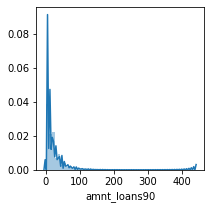

In [97]:
plt.figure(figsize=(3,3))
sns.distplot(ds['amnt_loans90'])
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

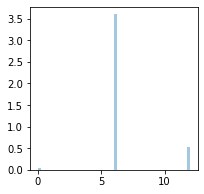

In [98]:
plt.figure(figsize=(3,3))
sns.distplot(ds['maxamnt_loans90'])
plt.show()

In [ ]:
plt.figure(figsize=(3,3))
sns.distplot(ds['medianamnt_loans90'])
plt.show()

In [ ]:
plt.figure(figsize=(3,3))
sns.distplot(ds['payback90'])
plt.show()

From above distribution plot, it seems data is skewed.

# ViolinPlot

violinplots are used to represent comparison of a variable distribution (or sample distribution)
across different 'categories'

In [ ]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['label'])

In [ ]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['daily_decr30'])

In [ ]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['fr_ma_rech30'])

In [ ]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['medianamnt_ma_rech30'])

In [ ]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['sumamnt_ma_rech90'])

In [ ]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['fr_da_rech90'])

In [ ]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['medianamnt_loans30'])

# Histograms

In [ ]:
plt.figure(figsize=(3,3))
plt.hist(ds['label'])
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(ds['cnt_ma_rech30'])
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(ds['medianmarechprebal30'])
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(ds['sumamnt_ma_rech90'])
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(ds['medianmarechprebal90'])
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(ds['fr_da_rech90'])
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(ds['cnt_loans30'])
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(ds['medianamnt_loans30'])
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(ds['payback30'])
plt.show()

# Bivariate Analysis

In [ ]:
plt.figure(figsize=(3,3))
ds.plot(x='daily_decr30', y='label', kind='line')
plt.show()

In [ ]:
plt.figure(figsize=(3,3))
ds.plot(x='daily_decr90', y='label', kind='line')
plt.show()

In [ ]:
plt.figure(figsize=(3,3))
ds.plot(x='medianmarechprebal30', y='label', kind='line')
plt.show()

In [ ]:
plt.figure(figsize=(3,3))
ds.plot(x='sumamnt_ma_rech90', y='label', kind='line')
plt.show()

In [ ]:
sns.barplot(x='fr_da_rech90', y='label', data=ds)
plt.show()

In [ ]:
sns.barplot(x='fr_da_rech90', y='label', data=ds)
plt.show()

In [ ]:
sns.barplot(x='maxamnt_loans30', y='maxamnt_loans90', data=ds)
plt.show()

In [ ]:
sns.barplot(x='cnt_loans90', y='amnt_loans90', data=ds)
plt.show()

In [ ]:
sns.pointplot(x='maxamnt_loans90', y='label', data=ds)

In [ ]:
sns.jointplot(data=ds, x="rental90", y="msisdn" )
plt.show()

In [ ]:
sns.pairplot(ds)
plt.show()

In [ ]:
# Checking the skewness of the data
ds.skew()

In [ ]:
# Remove skewness 
for col in ds.columns:
    if ds.skew().loc[col] > 0.55:
        ds[col] = np.sqrt(ds[col])

In [ ]:
ds.skew()

In [ ]:
for i in range(1, 17):
    # Remove skewness 
    for col in ds.columns:
        if ds.skew().loc[col] > 0.55:
            ds[col] = np.sqrt(ds[col])

In [ ]:
ds.skew()

In [ ]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore

for i in ds.columns:
    ds_copy = ds.drop(i, axis=1 )
    z = np.abs(zscore(ds_copy))
    ds_new = ds_copy [(z<3).all(axis=1)]
    print (ds_new.shape, i)

In [ ]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

In [ ]:
# Assigning the input and output data
df_x = ds.drop(columns = ['label'])
y = ds['label']

In [ ]:
y.head()

In [ ]:
df_x.replace(np.NaN, 0, inplace=True)

In [ ]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [ ]:
x.head()

In [ ]:
(x.shape, y.shape)

# Classification algorithm for dataset: with target column 'label'

In [ ]:
y.unique()

In [ ]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

Using the below algorithms for classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()
LR = LogisticRegression()
GNB = GaussianNB()

Creating the array of algorithms

In [ ]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTraeeClassifier', DT))
models.append(('RandomForestClassifier', RFC))
models.append(('LogisticRegression', LR))
models.append(('GaussianNB', GNB))

As it is a large dataset, for that we are splitting the datset into training and testing dataset. 
We will use the sample dataset for training and will use the testing dataset for testing. 
For splitting the dataset, we are using the best random state as 42.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = .90)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
print ('Training dataset: x_train,y_train')
print ('Testing dataset: x_test,y_test')

In [ ]:
x = x_train
y = y_train

In [ ]:
x_test1 = x_test
y_test1 = y_test

Here we will do all the processing on training dataset and for testing will use x_test, y_test

In [ ]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .20)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [ ]:
# Displaying the data in tabular form
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

We observed that after using multiple algorithms, RandomForestClassifier is giving the best accuracy score. So we will create the model using RandomForestClassifier.

In [ ]:
# GridSearchCV for RandomForestClassifier
parameters = { 'n_estimators': [100,150, 200, 250, 300], 'criterion': ['gini', 'entropy'], 'max_features':
              ['auto', 'sqrt', 'log2']
}
gsc = GridSearchCV(estimator = RFC, param_grid = parameters, cv=10)

In [ ]:
gsc

In [ ]:
df = pd.DataFrame(x_test1, columns = x_test1.columns)

In [ ]:
df['label'] = y_test1

In [ ]:
df.replace(np.NaN, 0, inplace=True)

In [ ]:
df.head()

As the dataset is too large, we are splitting the dataset and performing the test predictions.

In [ ]:
df_split = np.array_split(df, 4)

In [ ]:
df_split[0]['label'].head()

In [ ]:
df_split[0].head()

In [ ]:
j = 0

for i in df_split:

    y = i['label']
    x = i.drop(columns = ['label'])
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=66, test_size = 0.20)
    rfc = RandomForestClassifier(criterion= 'gini', max_features='sqrt', n_estimators= 200)
    rfc.fit(x_train, y_train)
    y_pred =  rfc.predict(x_test)
    print (y_pred)
    
     # Saving the predicted values in csv files
    dft = pd.DataFrame(y_pred)
    dft.to_csv ('pred_mfi_'+ str(j) +'.csv')
    j = j + 1
    
    print ('------*************-----')
    print ("accuracy score: ", accuracy_score(y_test, y_pred))
    print ("Classification Report : \n", classification_report (y_test, y_pred))
    print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    sc = cross_val_score(rfc, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    

    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)

    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title("Confusion Matrix")
    print (sns.heatmap(cm, annot=True))

    plt.subplot(912)
    plt.title("ROC AUC curve")
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n------*************-----')

In [ ]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(rfc, 'micro_credit.pkl')
clf = joblib.load('micro_credit.pkl')
clf.predict(x_test)